<a href="https://colab.research.google.com/github/sinyoung0110/DeepLearning_2024_2/blob/main/Deep_Leanring_%E1%84%86%E1%85%A1%E1%84%8C%E1%85%B5%E1%84%86%E1%85%A1%E1%86%A83(%E1%84%80%E1%85%AD%E1%84%8C%E1%85%A2164)5%E1%84%8C%E1%85%A1%E1%86%BC_%E1%84%8C%E1%85%A5%E1%86%AB%E1%84%8B%E1%85%B5%E1%84%92%E1%85%A1%E1%86%A8%E1%84%89%E1%85%B3%E1%86%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# #한글 서체 설치 # 생략 가능
# #실행하려면 다음 코드 앞의 #를 삭제한 후 실행해주세요.

# !sudo apt-get install -y fonts-nanum  # 폰트 설치 여부 확인
# !sudo fc-cache -fv                    # 캐시를 다시 갱신
# #!rm ~/.cache/matplotlib -rf           # Matplotlib 캐시 삭제

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
#설치 후 런타임 > 런타임 다시 시작을 해줘야 합니다.
#이 과정이 싫다면 5.2 합성곱 신경맛 맛보기로 건너 뛰어도 상관없습니다.

In [31]:
# #한글깨짐 해결
# #이 과정이 싫다면 건너 뛰어도 상관없습니다. 실행하려면 다음 코드 앞의 #을 삭제해주세요.
# import matplotlib.pyplot as plt

# plt.rc('font', family='NanumBarunGothic')


In [ ]:
#5.2 합성곱 신경망 맛보기

In [1]:
# 주요 라이브러리 불러오기
import numpy as np                   # 다차원 배열과 행렬 계산을 위한 라이브러리
import tensorflow as tf              # 딥러닝 모델 구현을 위한 텐서플로 라이브러리
import matplotlib.pyplot as plt      # 데이터 시각화를 위한 라이브러리

In [2]:
# fashion_mnist 데이터셋을 TensorFlow에서 제공하는 keras의 내장 데이터셋으로 로드
fashion_mnist = tf.keras.datasets.fashion_mnist

# 데이터셋을 훈련용 데이터(x_train, y_train)와 테스트용 데이터(x_test, y_test)로 분리
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# `fashion_mnist.load_data()` 함수는 이미 훈련 데이터와 테스트 데이터가 분리되어 제공되므로,
# 별도로 `split`을 사용할 필요가 없음. 훈련용 데이터는 60,000개의 이미지,
# 테스트용 데이터는 10,000개의 이미지로 구성됨.


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


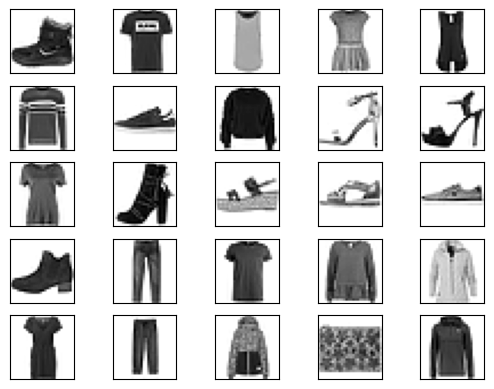

In [3]:
# 클래스 이름 리스트: 각 숫자 라벨에 해당하는 의류 항목을 지정
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',   'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

# 25개의 훈련 이미지를 5x5 형태로 출력
for i in range(25):
    # 5x5 그리드에서 i+1번째 서브플롯 생성
    plt.subplot(5, 5, i+1)

    # 격자선 비활성화
    plt.grid(False)

    # x축과 y축 눈금 비활성화
    plt.xticks([])
    plt.yticks([])

    # 이미지를 흑백(binary) 색상으로 출력
    plt.imshow(x_train[i], cmap=plt.cm.binary)

# 이미지를 화면에 출력
plt.show()


In [4]:
# x_train과 x_test의 픽셀 값을 0과 1 사이로 정규화 (이미지 데이터의 픽셀 값은 0-255 범위이므로 255로 나누어 정규화)
x_train, x_test = x_train / 255.0, x_test / 255.0

# 모델 구성: 순차적 모델(Sequential)을 사용하여 신경망 층을 순차적으로 쌓음
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),  # 28x28 크기의 이미지를 1D 배열로 변환 (입력 이미지의 형태를 모델이 이해할 수 있는 벡터로 변환)
  tf.keras.layers.Dense(128, activation='relu'),  # 128개의 뉴런을 가지며 ReLU 활성화 함수 사용 (은닉층)
  tf.keras.layers.Dropout(0.2),  # 학습 중에 20%의 뉴런을 무작위로 비활성화하여 과적합을 방지
  tf.keras.layers.Dense(10, activation='softmax')  # 10개의 클래스를 분류하기 위한 출력층, 소프트맥스 활성화 함수 사용
])

# 모델 컴파일: 모델 학습을 위한 최적화 함수, 손실 함수 및 평가 지표 설정
model.compile(optimizer='adam',  # Adam 옵티마이저 사용 (빠르고 효율적인 학습을 위한 기본 옵티마이저)
              loss='sparse_categorical_crossentropy',  # 다중 클래스 분류 문제에 적합한 손실 함수
              metrics=['accuracy'])  # 모델 성능 평가 지표로 정확도(accuracy) 사용

# 모델 학습: 훈련 데이터(x_train, y_train)를 사용하여 5번의 에포크(epoch) 동안 학습
model.fit(x_train, y_train, epochs=5)

# 모델 평가: 테스트 데이터(x_test, y_test)를 사용하여 성능을 평가하고 결과 출력
model.evaluate(x_test,  y_test, verbose=2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7653 - loss: 0.6766
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8526 - loss: 0.4106
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8640 - loss: 0.3741
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8714 - loss: 0.3465
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8757 - loss: 0.3345
313/313 - 1s - 4ms/step - accuracy: 0.8654 - loss: 0.3767


[0.37669745087623596, 0.8654000163078308]

In [5]:
# x_train 데이터를 4D 배열로 변환:
# 첫 번째 차원은 샘플의 수, 두 번째와 세 번째 차원은 이미지의 높이와 너비(28x28),
# 마지막 차원은 채널(흑백 이미지이므로 1)을 나타냄
X_train_final = x_train.reshape((-1, 28, 28, 1)) / 255.  # 픽셀 값을 0-1 범위로 정규화
X_test_final = x_test.reshape((-1, 28, 28, 1)) / 255.


In [6]:
# Convolutional Neural Network (CNN) 모델 생성
model_with_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),  # 첫 번째 Convolutional Layer: 32개의 필터, 커널 크기 (3,3), 'same' 패딩, 활성화 함수 ReLU
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),  # 첫 번째 MaxPooling Layer: 2x2 풀링 윈도우, 스트라이드 2
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),  # 두 번째 Convolutional Layer: 64개의 필터, 커널 크기 (3,3), 'same' 패딩, 활성화 함수 ReLU
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),  # 두 번째 MaxPooling Layer: 2x2 풀링 윈도우, 스트라이드 2
    tf.keras.layers.Flatten(),  # Dense Layer를 위한 Flatten: 2D 출력을 1D 벡터로 변환
    tf.keras.layers.Dense(128, activation='relu'),  # 첫 번째 Fully Connected Layer: 128개의 뉴런, 활성화 함수 ReLU
    tf.keras.layers.Dense(10, activation='softmax')  # 두 번째 Fully Connected Layer: 10개의 뉴런 (클래스 수), 활성화 함수 Softmax (확률 분포로 출력)
])

# 모델 컴파일: Adam 옵티마이저, sparse categorical crossentropy 손실 함수, 정확도 평가 지표 사용
model_with_conv.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# 모델 훈련: X_train_final 데이터를 사용하여 5번의 에폭 동안 훈련
model_with_conv.fit(X_train_final, y_train, epochs=5)  # X_train_final: 훈련 데이터, y_train: 레이블, epochs=5: 5번의 에폭 동안 학습

# 모델 평가: X_test_final 데이터를 사용하여 테스트 세트에서 모델 성능 평가
model_with_conv.evaluate(X_test_final, y_test, verbose=2)  # X_test_final: 테스트 데이터, y_test: 실제 레이블, verbose=2: 출력 세부 정보 수준 설정


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5622 - loss: 1.2094
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7893 - loss: 0.5716
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8144 - loss: 0.5034
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8366 - loss: 0.4562
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8477 - loss: 0.4248
313/313 - 2s - 7ms/step - accuracy: 0.8442 - loss: 0.4317


[0.43173789978027344, 0.8442000150680542]

In [8]:
# <노트>
# pip install scikit_image: 노트의 내용을 실습하기 위해서는 scikit_image 라이브러리를 설치해야합니다
!pip install scikit_image

In [9]:
import numpy as np  # NumPy 라이브러리: 배열 연산을 위한 라이브러리, 수치 계산에 자주 사용됨
from skimage.color import rgb2lab, rgb2gray, lab2rgb  # skimage 라이브러리의 색상 변환 관련 함수들 임포트 (RGB <-> LAB, 그레이스케일 변환 등)
from skimage.io import imread, imshow  # skimage 라이브러리에서 이미지 읽기 및 표시 함수 임포트
import matplotlib.pyplot as plt  # matplotlib의 pyplot을 임포트하여 그래프나 이미지를 시각화


In [10]:
def print_image_summary(image, labels):
    # 이미지의 세부 정보를 출력하는 함수

    print('--------------')
    print('Image Details:')
    print('--------------')

    # 이미지의 크기 출력 (shape)
    print(f'Image dimensions: {image.shape}')

    print('Channels:')

    # labels의 길이가 1이면, 이미지의 채널 차원을 추가하여 색상 채널을 분리
    if len(labels) == 1:
        image = image[..., np.newaxis]  # np.newaxis는 새로운 차원을 추가하는 데 사용됨

    # 각 채널에 대해 최소값과 최대값을 출력
    for i, lab in enumerate(labels):
        # 각 채널에서 최소값과 최대값 계산
        min_val = np.min(image[:,:,i])  # 해당 채널의 최소값
        max_val = np.max(image[:,:,i])  # 해당 채널의 최대값

        # 채널 이름과 함께 min, max 값을 출력
        print(f'{lab} : min={min_val:.4f}, max={max_val:.4f}')


Saving bird.jpg to bird.jpg


(-0.5, 453.5, 702.5, -0.5)

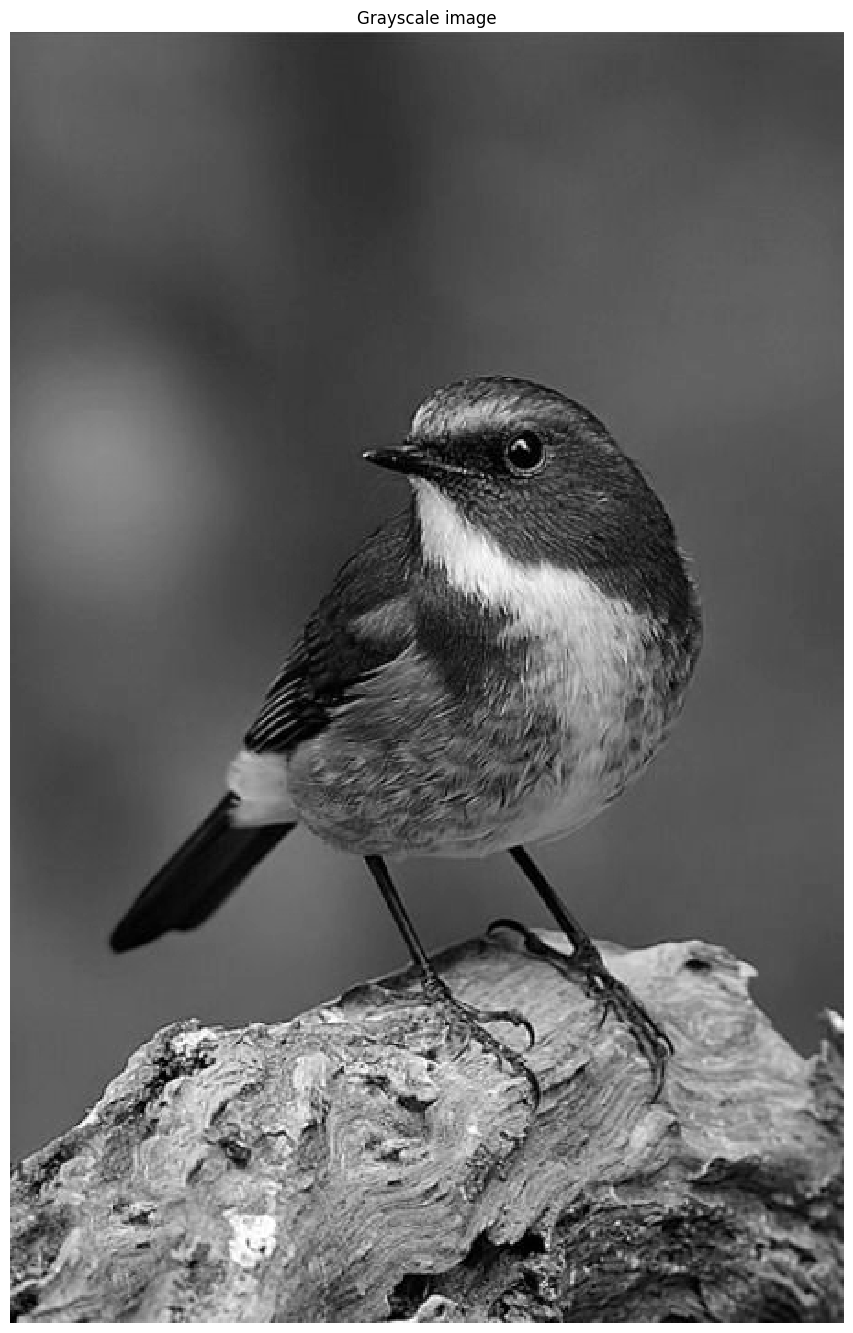

In [11]:
from google.colab import files  # Google Colab에서 파일을 불러오기 위한 라이브러리

file_uploaded = files.upload()  # 사용자가 파일을 업로드할 수 있도록 요청하는 코드

# 'bird.jpg' 파일을 불러오고, 이를 그레이스케일 이미지로 읽어들임
# as_gray=False일 경우, 이미지가 컬러로 읽혀짐 (RGB 형식으로 읽혀짐)
image_gs = imread('bird.jpg', as_gray=True)  # 그레이스케일 이미지로 읽기

# 이미지를 출력할 subplot을 생성 (가로 9, 세로 16 크기)
fig, ax = plt.subplots(figsize=(9, 16))  # ax는 이미지 또는 그래프가 그려지는 좌표축(axes)을 의미


imshow(image_gs, ax=ax)  # ax에 이미지 표시

ax.set_title('Grayscale image')  # 이미지에 제목을 설정

# 이미지의 축을 보이지 않게 설정
ax.axis('off')  # 축을 숨기기 위해 'off' 설정


In [12]:
# 'image_gs' 이미지를 사용하여 'G' 채널(그레이스케일 이미지의 경우, 단일 채널)의 최소값과 최대값 출력

print_image_summary(image_gs, ['G'])
# </노트>

--------------
Image Details:
--------------
Image dimensions: (703, 454)
Channels:
G : min=0.0000, max=1.0000


######################################
#### P 164 전이학습
####

# 전이학습 ( transfer learning )
: 이미지넷처럼 아주 큰 데이터셋을 써서 훈련된 모델의 가중치를 가져와 우리가 해결하려는 과제에 맞게 보정해서 사용하는 것.

=>결과적으로 비교적 적은 수의 데이터를 가지고도 우리가 원하는 과제를 해결할 수 있음

>**특성 추출 기법 (feature extractor)**   
: ImageNet 데이터셋으로 사전 훈련된 모델을 가져온 후 마지막에 완전 연결층 부분만 새로 만듦
입력데이터 -> 사전 훈련된 합성곱 재사용 -> 데이터 분류기(완전연결층) -> 출력

ex) ResNet50, VGG16, Xception, Inception V3

In [ ]:
#5.3 전이학습
# 5.3.1 특성추출(Feature Extractor) 기법

# 라이브러리 및 클래스 설명

1. **`from tensorflow.keras import Model`**  
   - Model: Keras의 기본 모델 클래스입니다.  
     주로 사용자 정의 모델을 만들 때 상속하여 사용합니다.  
     전이 학습에서는 `Model`을 상속받아 새 아키텍처를 정의하거나 사전 학습된 모델을 커스터마이징할 수 있습니다.

2. **`from tensorflow.keras.models import Sequential`**  
   - Sequential: 모델의 층을 순차적으로 쌓을 수 있게 해주는 클래스입니다.  
     복잡한 연결이 없고 각 층이 순서대로 쌓이는 경우 적합합니다.  
     전이 학습에서는 주로 사전 학습된 모델에 새로운 층을 추가할 때 사용됩니다.

3. **`from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D`**  
   - Dense: 완전 연결층. 이전 층의 모든 뉴런과 연결되는 층입니다.  
     전이 학습에서는 새로운 과제에 대해 예측을 수행할 때 자주 추가됩니다.
   - GlobalMaxPool2D: 특징 맵의 전체 높이와 너비에서 최대 값을 뽑아 각 채널을 하나의 값으로 축소하는 층입니다.  
     특징을 간결하게 표현하는 데 유용합니다.
   - GlobalAveragePooling2D: 특징 맵의 전체 영역에 걸쳐 평균 풀링을 수행합니다.  
     파라미터 수를 줄이고 일반화 성능을 높이는 데 도움을 줄 수 있습니다.

4. **`from tensorflow.keras.applications import ResNet50`**  
   - ResNet50: ResNet 계열의 사전 학습된 모델로, 전이 학습에 널리 사용됩니다.  
     50층을 가진 신경망으로, 대규모 데이터셋(예: ImageNet)으로 사전 학습된 상태입니다.  
     불러오면 새 작업에 맞게 특성 추출 또는 미세 조정을 할 수 있습니다.

5. **`from tensorflow.keras.preprocessing.image import ImageDataGenerator`**  
   - ImageDataGenerator: 이미지 데이터를 실시간으로 증강하고 전처리하는 클래스입니다.  
     회전, 확대, 뒤집기 등을 통해 데이터 다양성을 높여 모델의 일반화 성능을 향상시킵니다.  
     전이 학습에서는 데이터 증강을 통해 과적합을 줄이는 데 자주 사용됩니다.

In [34]:
# 주요 라이브러리 불러오기
import numpy as np                   # 다차원 배열과 행렬 계산을 위한 라이브러리
import tensorflow as tf              # 딥러닝 모델 구현을 위한 텐서플로 라이브러리
import matplotlib.pyplot as plt      # 데이터 시각화를 위한 라이브러리
import matplotlib.image as mpimg     # 이미지 처리를 위한 라이브러리

# Keras 모듈에서 필요한 클래스와 함수 불러오기
from tensorflow.keras import Model                  # 모델의 기본 클래스
from tensorflow.keras.models import Sequential      # Sequential 모델을 생성하는 클래스
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D  # 신경망의 레이어들
from tensorflow.keras.applications import ResNet50  # ResNet50 모델 불러오기 (전이 학습에 사용)
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # 이미지 데이터 전처리를 위한 클래스


# ResNet50: Residual Network(ResNet)
50개의 층을 가진 심층 신경망
> : 네트워크가 깊어지더라도 학습이 효율적으로 이루어지도록 skip connection 구조가 포함되어 있습니다.
          주로 이미지 분류, 객체 검출, 이미지 특징 추출 등의 작업에 활용되며, 전이 학습으로 널리 사용됩니다.



1. include_top=True  
    - 네트워크의 최상단에 위치한 완전 연결층(fully connected layer)을 포함할지 여부를 설정합니다.
    - True로 설정하면 ImageNet의 1000개 클래스를 분류할 수 있는 최상단 분류 레이어가 포함됩니다.
    - False로 설정하면 분류 레이어가 제외되며, 주로 전이 학습에서 특징 추출만 필요할 때 사용됩니다.

2. weights="imagenet"  
    - 사전 학습된 가중치를 로드할지 결정합니다. "imagenet"으로 설정 시 ImageNet 데이터셋으로 학습된 가중치를 사용합니다.
    - None으로 설정하면 랜덤 가중치가 초기화됩니다.
    - 사전 학습된 가중치를 사용하면, 모델이 일반적인 이미지 특징을 이미 학습한 상태로 전이 학습에 적용할 수 있습니다.

3. input_tensor=None  
    - 모델의 입력 텐서를 직접 지정할 수 있습니다.
    - 기본값이 None이므로 새 입력 텐서를 생성하지만, 특정 입력 텐서를 지정하여 복잡한 네트워크 연결 시 활용할 수 있습니다.

4. input_shape=None  
    - 입력 이미지의 크기를 지정합니다. 기본값은 None이며, ResNet50의 기본 입력 크기인 (224, 224, 3)을 사용합니다.
    - 데이터의 크기에 따라 조정할 수 있지만, 전이 학습에서는 보통 기본 크기를 유지하는 것이 좋습니다.

5. pooling=None  
    - include_top이 False인 경우, 최상단 특징 맵에 대한 풀링 방식을 지정합니다.
    - None: 풀링 없이 3D 텐서를 그대로 유지
    - "avg": 글로벌 평균 풀링을 통해 2D 텐서 형태로 변환
    - "max": 글로벌 최대 풀링을 적용하여 2D 텐서 형태로 변환
    - 이는 완전 연결층 없이 고정된 크기의 특징 벡터를 얻고자 할 때 유용합니다.

6. classes=1000  
    - 분류할 클래스 수를 지정합니다.
    - 기본값은 ImageNet 데이터셋과 동일한 1000개 클래스입니다.
    - 다른 작업에 사용할 경우 클래스 수를 해당 작업에 맞게 변경할 수 있습니다.

**ResNet50을 사용하는 이유:**
ResNet50은 매우 깊은 네트워크임에도 skip connection을 통해 효율적으로 학습할 수 있어 기울기 소실 문제를 줄여줍니다.
전이 학습에 자주 사용되며, 이미지 분류, 객체 검출, 이미지 검색 및 특징 추출 작업에서 성능이 우수합니다.
예를 들어, 의료 영상 분석, 자율 주행 차량의 이미지 인식, 얼굴 인식, 소셜 미디어 이미지 분석 등의 다양한 비전 분야에서 사용됩니다.


In [35]:

model = ResNet50(include_top=True,    # 네트워크의 최상단 완전 연결층 포함 여부 (True로 설정 시 ImageNet의 분류 레이어 포함)
                 weights="imagenet",  # 미리 학습된 ImageNet 가중치를 로드하여 전이 학습에 사용
                 input_tensor=None,   # 입력 텐서 지정 (기본값 None; 별도 텐서를 지정할 수 있음)
                 input_shape=None,    # 입력 이미지의 크기 지정 (기본값 None; ResNet50 기본 크기 사용)
                 pooling=None,        # 완전 연결층을 제외한 경우, 특징 맵의 풀링 방식 (None: 풀링 없음)
                 classes=1000)        # 분류할 클래스 수 (ImageNet은 1000개의 클래스가 있음)



In [36]:
model.summary()  # 모델의 전체 구조와 파라미터 수 요약 출력

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [37]:
# 모델의 모든 가중치를 고정하여 학습되지 않도록 설정 (특징 추출 용도로 사용)
model.trainable = False  # ResNet50의 기존 가중치를 그대로 사용하여 특징을 추출함.
                         # 마지막 Dense 층만 훈련하여 고양이와 개를 분류하기 위해 False로 설정.
                         # 이렇게 하면 모델의 훈련 시간이 단축되고 과적합을 방지할 수 있음.


# Sequential 모델을 재구성
model = Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),  # InputLayer를 명시적으로 지정하면 모델의 구조가 일관되게 설정되어, 오류를 방지하고 각 레이어의 입출력 크기를 정확히 파악할 수 있어 모델 구조에 대한 이해와 관리가 쉬워짐
    model,                          # 기존 ResNet50 모델을 첫 번째 층으로 추가
    Dense(2, activation='sigmoid')  # 출력층: 2개의 뉴런, 시그모이드 활성화 함수 사용 (이진 분류를 위한 출력층)
])

# 수정된 모델 구조 출력
model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1000)                │      25,636,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │           2,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,638,714 (97.80 MB)

 Trainable params: 2,002 (7.82 KB)

 Non-trainable params: 25,636,712 (97.80 MB)

`tf.keras.layers.InputLayer(input_shape=(224, 224, 3))`를 추가하는 이유는 모델에 **입력 크기**를 명시적으로 지정하여 `model.summary()`에서 네트워크 구조의 각 레이어에 대한 출력 형태(Output Shape)가 정확하게 표시되도록 하기 위해서입니다.

### 이유 및 동작 원리

ResNet50 모델은 `include_top=True` 설정 시 마지막 분류 레이어가 포함되어 **1000개의 노드**로 된 출력을 생성합니다. 이 구조를 특징 추출 용도로 사용하고 마지막 `Dense(2, activation='sigmoid')` 레이어를 추가하여 고양이와 개를 이진 분류하는 방식으로 변경하려면 **입력 레이어의 크기**가 정확히 정의되어야 합니다.

#### InputLayer 사용의 이점
`tf.keras.layers.InputLayer(input_shape=(224, 224, 3))`를 명시적으로 추가하면 Sequential 모델의 입력이 `(224, 224, 3)`으로 고정되어 ResNet50에 입력이 전달됩니다. 이렇게 하면 `model.summary()` 함수가 모델의 각 층에 대한 **입력 크기와 출력 크기**를 정확히 계산할 수 있습니다.


---


### `model.summary()` 결과 설명

#### 레이어 설명
1. **`resnet50 (Functional)`**  
   - ResNet50의 출력이 **1000개의 노드**로 구성된 완전 연결 레이어(`include_top=True` 설정으로 포함)가 됩니다.
   - 따라서 출력 형태 `(None, 1000)`이 나타납니다. 이때, `None`은 배치 크기를 의미하며, 입력 데이터 크기에 따라 동적으로 지정됩니다.
   - 파라미터 수는 **25,636,712**이며, 이는 ResNet50의 가중치 수와 동일합니다.

2. **`dense_4 (Dense)`**  
   - 이 층은 **Dense(2, activation='sigmoid')**로 설정된 마지막 분류 층입니다.
   - 1000개의 입력을 받아 **2개의 노드**로 출력하며, 시그모이드 활성화 함수를 통해 **이진 분류**를 수행합니다.
   - 이 레이어의 파라미터는 **2,002개**입니다 (1000개의 입력 노드 x 2개의 출력 노드 + 2개의 바이어스 항).

#### 파라미터 구분
- **Trainable params (2,002)**: `model.trainable = False`로 ResNet50의 모든 기존 가중치는 고정되고, 마지막 Dense 층만 학습되므로 2,002개의 파라미터만 훈련됩니다.
- **Non-trainable params (25,636,712)**: ResNet50의 가중치(25,636,712개)는 고정되어 변경되지 않으므로 Non-trainable params로 나타납니다.

이러한 설정을 통해 훈련 시간 단축, 과적합 방지, 이진 분류 문제에 적합한 간단한 구조를 만들 수 있습니다.

In [38]:
# model.compile()은 모델이 훈련을 시작하기 전에 손실 함수, 옵티마이저, 평가 지표를 설정하는 중요한 단계

model.compile(loss='binary_crossentropy',    # 이진 분류 문제에 맞는 손실 함수 사용 (고양이와 개를 구분하는 문제) | 손실함수 : 모델이 얼마나 잘 예측했는지를 평가하는 기준
              optimizer='adam',               # Adam 옵티마이저 사용 (빠르고 효율적인 학습을 위한 기본 옵티마이저)| 옵티마이저 : 손실 함수를 최소화하는 방향으로 모델의 가중치를 업데이트하는 알고리즘
              metrics=['accuracy'])          # 모델 성능 평가 지표로 정확도(accuracy) 사용


In [44]:
from google.colab import files  # 구글 코랩에서 파일을 업로드하는 라이브러리
file_uploaded = files.upload()  # 파일 업로드

# 시간이 오래 걸릴 경우, 구글 드라이브에서 파일을 불러오는 방법으로 변경 가능합니다.
# from google.colab import drive
# drive.mount('/content/drive/')  # 구글 드라이브 연결

# chap5 > data 폴더에 있는 catanddog.zip 파일을 선택하여 압축을 풉니다.
train_dir = "catanddog.zip"  # 압축 파일 경로
!unzip catanddog.zip  # catanddog.zip 파일의 압축을 풉니다.


Saving catanddog.zip to catanddog.zip
Archive:  catanddog.zip
replace train/Cat/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: train/Cat/0.jpg         
  inflating: train/Cat/1.jpg         
  inflating: train/Cat/10.jpg        
  inflating: train/Cat/11.jpg        
  inflating: train/Cat/12.jpg        
  inflating: train/Cat/13.jpg        
  inflating: train/Cat/14.jpg        
  inflating: train/Cat/15.jpg        
  inflating: train/Cat/16.jpg        
  inflating: train/Cat/17.jpg        
  inflating: train/Cat/18.jpg        
  inflating: train/Cat/19.jpg        
  inflating: train/Cat/2.jpg         
  inflating: train/Cat/20.jpg        
  inflating: train/Cat/21.jpg        
  inflating: train/Cat/22.jpg        
  inflating: train/Cat/23.jpg        
  inflating: train/Cat/24.jpg        
  inflating: train/Cat/25.jpg        
  inflating: train/Cat/26.jpg        
  inflating: train/Cat/27.jpg        
  inflating: train/Cat/28.jpg        
  inflating: train/Cat/29.jpg        

In [45]:
BATCH_SIZE = 64  # 배치 크기 설정 (한 번에 처리할 데이터의 수)
image_height = 224  # 입력 이미지의 높이
image_width = 224  # 입력 이미지의 너비
train_dir = "train/"  # 훈련 데이터가 있는 디렉토리 경로
valid_dir = "validation/"  # 검증 데이터가 있는 디렉토리 경로

# 훈련 데이터 전처리 및 증강 설정
train = ImageDataGenerator(
    rescale=1./255,  # 이미지의 픽셀 값을 [0, 1]로 정규화
    rotation_range=10,  # 이미지를 무작위로 회전시킬 범위
    width_shift_range=0.1,  # 이미지를 수평으로 이동시킬 범위
    height_shift_range=0.1,  # 이미지를 수직으로 이동시킬 범위
    shear_range=0.1,  # 이미지를 임의로 기울일 범위
    zoom_range=0.1)  # 이미지를 무작위로 확대하거나 축소할 범위

# 검증 데이터 전처리 설정 (정규화만 수행)
valid = ImageDataGenerator(rescale=1.0/255.0)

# 훈련 데이터를 디렉토리에서 불러오기
train_generator = train.flow_from_directory(train_dir,
                                            target_size=(image_height, image_width),  # 이미지 크기 변경
                                            color_mode="rgb",  # RGB 컬러 모드로 이미지 로드 <->grayscale : 흑백모드
                                            batch_size=BATCH_SIZE,  # 배치 크기
                                            seed=32,  # 랜덤 시드 설정
                                            shuffle=True,  # 데이터 섞기
                                            class_mode="categorical")  # 다중 클래스 분류

# 검증 데이터를 디렉토리에서 불러오기
valid_generator = valid.flow_from_directory(valid_dir,
                                            target_size=(224, 224),  # 입력 이미지 크기 변경 (크기를 일치시켜 오류 방지)
                                            color_mode="rgb",  # RGB 컬러 모드로 이미지 로드
                                            batch_size=BATCH_SIZE,  # 배치 크기
                                            seed=7,  # 랜덤 시드 설정
                                            shuffle=True,  # 데이터 섞기
                                            class_mode="categorical")  # 다중 클래스 분류

# 모델 훈련
history = model.fit(train_generator,  # 훈련 데이터
                    epochs=10,  # 에폭 수
                    validation_data=valid_generator,  # 검증 데이터
                    verbose=2)  # 훈련 진행 상황을 출력



Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Epoch 1/10
7/7 - 6s - 847ms/step - accuracy: 0.5273 - loss: 0.6918 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 2/10
7/7 - 5s - 723ms/step - accuracy: 0.5273 - loss: 0.6917 - val_accuracy: 0.5000 - val_loss: 0.6939
Epoch 3/10
7/7 - 6s - 787ms/step - accuracy: 0.5273 - loss: 0.6917 - val_accuracy: 0.5000 - val_loss: 0.6940
Epoch 4/10
7/7 - 9s - 1s/step - accuracy: 0.5273 - loss: 0.6917 - val_accuracy: 0.5000 - val_loss: 0.6941
Epoch 5/10
7/7 - 6s - 865ms/step - accuracy: 0.5273 - loss: 0.6916 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 6/10
7/7 - 5s - 678ms/step - accuracy: 0.5273 - loss: 0.6916 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 7/10
7/7 - 6s - 818ms/step - accuracy: 0.5273 - loss: 0.6916 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 8/10
7/7 - 5s - 710ms/step - accuracy: 0.5273 - loss: 0.6916 - val_accuracy: 0.5000 - val_loss: 0.6944
Epoch 9/10
7/7 - 5s - 669ms/step - accuracy: 0.527

Text(0.5, 1.0, 'loss')

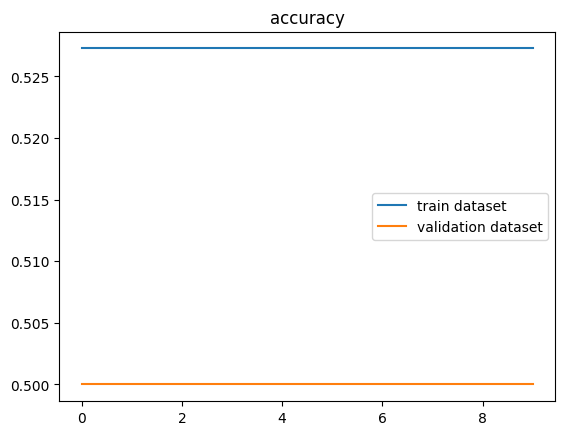

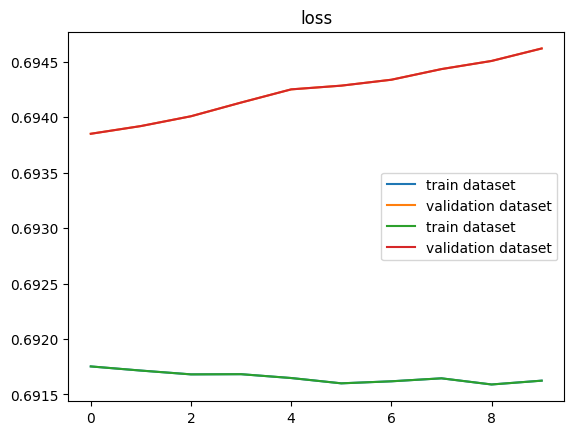

In [46]:
# 훈련과 검증 데이터의 정확도 및 손실 값을 그래프에 그리기
accuracy = history.history['accuracy']  # 훈련 데이터 정확도
val_accuracy = history.history['val_accuracy']  # 검증 데이터 정확도

loss = history.history['loss']  # 훈련 데이터 손실
val_loss = history.history['val_loss']  # 검증 데이터 손실

epochs = range(len(accuracy))  # 에폭 횟수에 맞춰 x축 값 설정

# 정확도 그래프 그리기
plt.plot(epochs, accuracy, label="train dataset")  # 훈련 정확도
plt.plot(epochs, val_accuracy, label="validation dataset")  # 검증 정확도
plt.legend()  # 범례 표시
plt.title('accuracy')  # 그래프 제목
plt.figure()  # 새로운 그래프 창 생성

# 손실 그래프 그리기
plt.plot(epochs, loss, label="train dataset")  # 훈련 손실
plt.plot(epochs, val_loss, label="validation dataset")  # 검증 손실
plt.legend()  # 범례 표시
plt.title('loss')  # 그래프 제목

# 손실 그래프 다시 그리기 (중복 그래프)
plt.plot(epochs, loss, label="train dataset")  # 훈련 손실
plt.plot(epochs, val_loss, label="validation dataset")  # 검증 손실
plt.legend()  # 범례 표시
plt.title('loss')  # 그래프 제목


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step


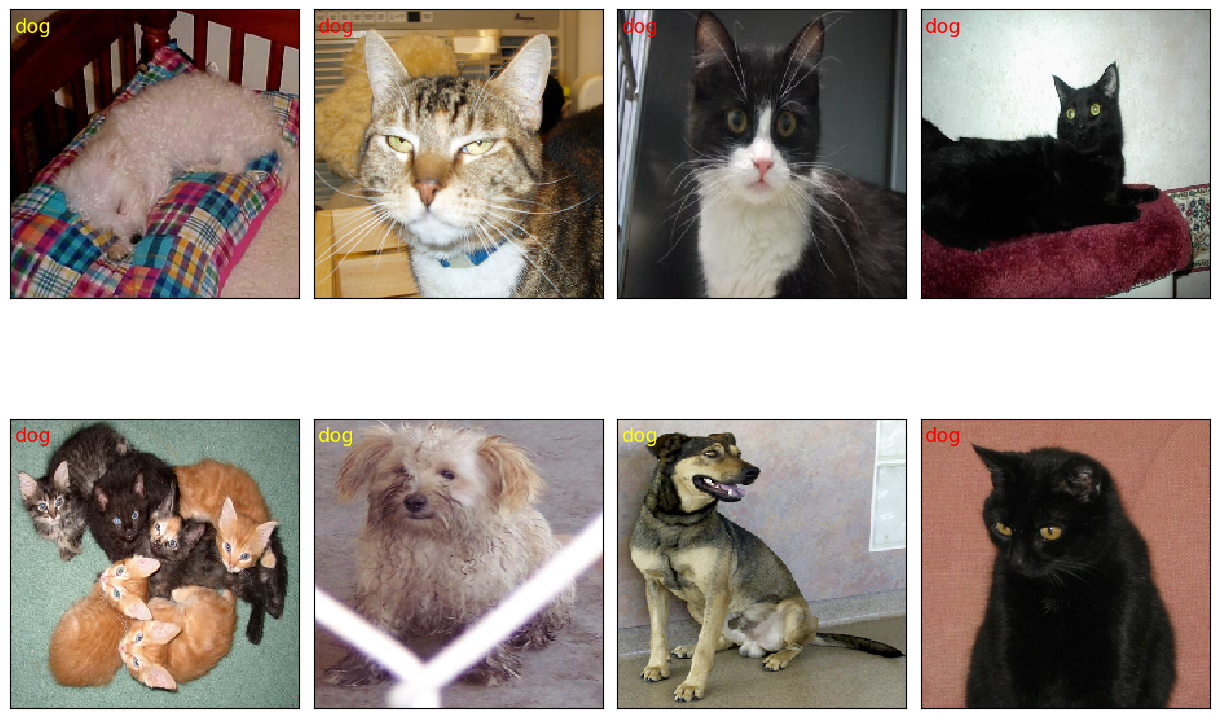

In [47]:
class_names = ['cat', 'dog']  # 고양이와 개 클래스 정의
validation, label_batch  = next(iter(valid_generator))  # 검증 데이터와 레이블을 하나의 배치로 가져옴
prediction_values = model.predict(validation)  # 모델을 사용하여 예측값 생성
prediction_values = np.argmax(prediction_values, axis=1)  # 예측값에서 가장 큰 값의 인덱스를 추출 (클래스 예측)

# 2x4 그리드로 이미지 출력 공간 설정
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)  # 서브플롯 간 간격 조정

for i in range(8):  # 8개의 이미지를 출력
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])  # 2x4 그리드의 서브플롯 위치 지정
    ax.imshow(validation[i], interpolation='nearest')  # 각 이미지를 표시
    # 예측값과 실제 레이블을 비교하여 색상으로 표시
    if prediction_values[i] == np.argmax(label_batch[i]):  # 예측이 맞으면
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)  # 노란색으로 텍스트 표시
    else:  # 예측이 틀리면
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)  # 빨간색으로 텍스트 표시

plt.show()  # 그래프 출력


In [ ]:
# 텐서플로 허브를 이용한 코드

In [51]:
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-hub

  Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 387.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 53.2 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


  Using cached tensorflow-2.17.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
Using cached tensorflow-2.17.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 23.1 MB/s eta 0:00:00
ERROR: Operation cancelled by user


In [1]:
#pip install tensorflow_hub
import tensorflow_hub as hub
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4",
                   input_shape=(224, 224, 3),
                   trainable=False),
    tf.keras.layers.Dense(2, activation='softmax')
])

NameError: name 'tf' is not defined

In [24]:
# 이미지 데이터 전처리 및 데이터 증강을 위한 ImageDataGenerator 객체 생성
train = ImageDataGenerator(
    rescale=1./255,  # 이미지 값을 [0, 1] 범위로 정규화
    rotation_range=10,  # 이미지를 무작위로 회전할 수 있는 범위 (0~10도)
    width_shift_range=0.1,  # 이미지를 수평으로 이동할 수 있는 범위 (전체 폭의 10%)
    height_shift_range=0.1,  # 이미지를 수직으로 이동할 수 있는 범위 (전체 높이의 10%)
    shear_range=0.1,  # 이미지를 전단 변형할 수 있는 범위 (기울기 조정)
    zoom_range=0.1)  # 이미지를 무작위로 확대/축소할 수 있는 범위

# 훈련 데이터 디렉토리에서 이미지를 불러오고 배치 처리
train_generator = train.flow_from_directory(train_dir,  # 훈련 데이터가 저장된 디렉토리 경로
                                            target_size=(image_height, image_width),  # 이미지 크기 변경
                                            color_mode="rgb",  # 컬러 모드 설정 (RGB 이미지)
                                            batch_size=BATCH_SIZE,  # 배치 크기 설정
                                            seed=1,  # 시드 설정 (랜덤성 통제)
                                            shuffle=True,  # 데이터 섞기
                                            class_mode="categorical")  # 분류 작업을 위한 레이블 형식 (여러 클래스의 경우)

# 검증 데이터에 대해서는 간단한 정규화만 수행
valid = ImageDataGenerator(rescale=1.0/255.0)  # 검증 데이터는 단순히 정규화만 수행

# 검증 데이터 디렉토리에서 이미지를 불러오고 배치 처리
valid_generator = valid.flow_from_directory(valid_dir,  # 검증 데이터가 저장된 디렉토리 경로
                                            target_size=(image_height, image_width),  # 이미지 크기 변경
                                            color_mode="rgb",  # 컬러 모드 설정 (RGB 이미지)
                                            batch_size=BATCH_SIZE,  # 배치 크기 설정
                                            seed=7,  # 시드 설정 (랜덤성 통제)
                                            shuffle=True,  # 데이터 섞기
                                            class_mode="categorical")  # 분류 작업을 위한 레이블 형식 (여러 클래스의 경우)

# 모델 컴파일
model.compile(loss='binary_crossentropy',  # 손실 함수 설정 (이진 분류를 위한 'binary_crossentropy')
              optimizer='adam',  # 옵티마이저 설정 (Adam 옵티마이저)
              metrics=['accuracy'])  # 성능 평가 지표로 정확도(accuracy) 사용


Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [25]:
# NumPy에서 expand_dims 함수 가져오기 - 배열의 차원을 확장할 때 사용
from numpy import expand_dims

# Keras에서 이미지를 불러오는 함수들 가져오기
from tensorflow.keras.preprocessing.image import load_img  # 이미지 파일을 로드하는 함수
from tensorflow.keras.preprocessing.image import img_to_array  # 이미지를 배열로 변환하는 함수
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # 이미지 데이터 증강을 위한 함수들

# 시각화 라이브러리인 Matplotlib의 pyplot 가져오기
from matplotlib import pyplot as plt  # 이미지를 화면에 표시하는 데 사용


In [26]:
# 'bird.jpg' 이미지를 불러옵니다. (default는 RGB 모드)
img = load_img('bird.jpg')  # load_img는 이미지를 PIL 객체로 로드합니다.

# 이미지를 NumPy 배열로 변환합니다. (shape: (height, width, channels))
data = img_to_array(img)  # img_to_array는 PIL 이미지를 NumPy 배열로 변환합니다.


AttributeError: 'NumpyArrayIterator' object has no attribute 'next'

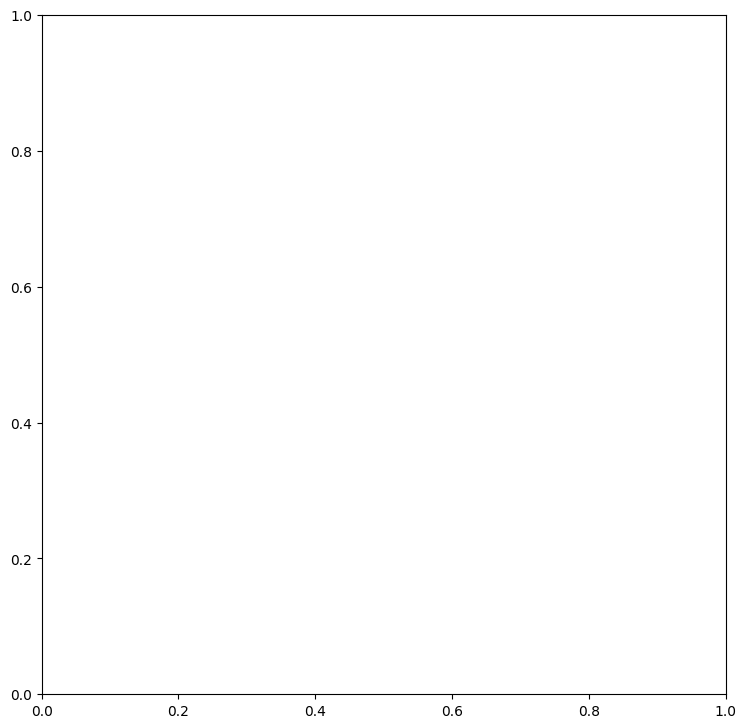

In [27]:
# width_shift_range는 이미지를 수평 방향(너비)으로 이동시키는 데이터 증강 기법입니다.
# - width_shift_range=[-200, 200]: 이미지를 수평 방향으로 -200픽셀에서 200픽셀 사이의 범위로 이동시킬 수 있도록 설정합니다.
# - 값이 음수일 경우 왼쪽으로, 양수일 경우 오른쪽으로 이동합니다. 이 값은 픽셀 단위로 설정되며,
#   수평 이동 범위를 설정할 수 있습니다.
# - 예를 들어, 이미지의 너비가 500픽셀이라면, -200에서 200픽셀 범위 내에서 이미지가 이동됩니다.
# - 이 기법은 모델이 다양한 수평 위치에 있는 객체를 인식할 수 있도록 도와주며, 실제 환경에서
#   물체가 다양한 위치에 있을 때 모델의 일반화 능력을 향상시킵니다.
# - 수평 이동을 통해 학습 데이터에서 더 많은 변형된 이미지를 생성하여, 더 강력한 모델을 학습시킬 수 있습니다.

# 데이터를 배치 차원 추가 (배치 크기: 1)
img_data = expand_dims(data, 0)  # expand_dims는 (1, height, width, channels) 형태로 차원을 추가합니다.

# ImageDataGenerator를 사용해 이미지 증강을 설정
data_gen = ImageDataGenerator(width_shift_range=[-200, 200])  # 수평 이동 범위 설정 (-200 ~ 200 픽셀)

# flow 메서드를 사용하여 배치 단위로 이미지를 생성
data_iter = data_gen.flow(img_data, batch_size=1)  # 배치 크기 1로 설정하여 하나씩 생성

# 결과를 3x3 그리드로 출력
fig = plt.figure(figsize=(30, 30))
for i in range(9):
    plt.subplot(3, 3, i+1)  # 3x3 그리드에서 각 이미지를 출력할 위치
    batch = data_iter.next()  # 다음 배치를 가져옵니다.
    image = batch[0].astype('uint16')  # 이미지를 uint16 타입으로 변환하여 출력
    plt.imshow(image)  # 이미지 출력
    plt.axis('off')  # 축 숨김
plt.show()  # 9개의 이미지 결과를 출력

In [ ]:
# height_shift_range는 이미지를 수직 방향(높이)으로 이동시키는 데이터 증강 기법입니다.
# - height_shift_range=0.5: 이미지를 수직 방향으로 최대 50%만큼 이동시킬 수 있도록 설정합니다.
# - 이 값은 이미지의 전체 높이를 기준으로 비율로 설정됩니다. 예를 들어, 이미지 높이가 100픽셀일 경우,
#   0.5로 설정하면 최대 50픽셀까지 수직으로 이동시킬 수 있습니다.
# - 이 기법은 모델이 이미지 내에서 위치 변화를 인식할 수 있도록 도와주며,
#   실제 환경에서 객체가 다양한 위치에 있을 때 모델의 일반화 능력을 향상시킵니다.
# - 수직 이동을 통해 학습 데이터에서 더 많은 변형된 이미지를 생성하고, 모델이 다양한 위치의 객체를 인식하도록 학습시킬 수 있습니다.
img_data = expand_dims(data, 0)  # expand_dims는 (1, height, width, channels) 형태로 차원을 추가합니다.

# ImageDataGenerator를 사용해 이미지 증강을 설정
data_gen = ImageDataGenerator(height_shift_range=0.5)  # 수직 이동 범위를 50%로 설정 (이미지 높이의 50%)

# flow 메서드를 사용하여 배치 단위로 이미지를 생성
data_iter = data_gen.flow(img_data, batch_size=1)  # 배치 크기 1로 설정하여 하나씩 생성

# 결과를 3x3 그리드로 출력
fig = plt.figure(figsize=(30, 30))
for i in range(9):
    plt.subplot(3, 3, i+1)  # 3x3 그리드에서 각 이미지를 출력할 위치
    batch = data_iter.next()  # 다음 배치를 가져옵니다.
    image = batch[0].astype('uint16')  # 이미지를 uint16 타입으로 변환하여 출력
    plt.imshow(image)  # 이미지 출력
    plt.axis('off')  # 축 숨김
plt.show()  # 9개의 이미지 결과를 출력


In [ ]:
# horizontal_flip과 vertical_flip은 이미지를 수평 또는 수직으로 뒤집는 데이터 증강 기법입니다.
# - horizontal_flip=True: 이미지를 수평(좌우)으로 뒤집습니다.
# - vertical_flip=True: 이미지를 수직(상하)으로 뒤집습니다.
# - 이 두 옵션을 활성화하면, 이미지의 여러 버전을 생성하여 모델이 다양한 방향에서도 객체를 인식할 수 있게 합니다.
# - 예를 들어, 수평 뒤집기(horizontal flip)는 좌우 대칭이 중요한 객체에 유용하며, 수직 뒤집기(vertical flip)는 특정 환경에서 유용할 수 있습니다.
# - 이 기법은 모델의 일반화 능력을 향상시켜, 새로운 데이터에 대한 예측 성능을 높이는 데 도움이 됩니다.
img_data = expand_dims(data, 0)

# 수평, 수직 뒤집기를 위한 데이터 증강 설정
data_gen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# 배치 크기 1로 이미지 생성
data_iter = data_gen.flow(img_data, batch_size=1)

# 3x3 그리드로 이미지 출력
fig = plt.figure(figsize=(30, 30))
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch = data_iter.next()  # 다음 배치 가져오기
    image = batch[0].astype('uint16')  # 이미지 타입 변환
    plt.imshow(image)  # 이미지 출력
    plt.axis('off')  # 축 숨기기
plt.show()


In [ ]:
# rotation_range는 이미지를 랜덤하게 회전시키는 데이터 증강 기법입니다.
# - 지정된 범위 내에서 이미지를 랜덤하게 회전시킵니다.
# - 예를 들어, rotation_range=90이면, 이미지가 -90도에서 +90도 사이의 각도로 랜덤하게 회전됩니다.
# - 이 방법은 모델이 다양한 방향에서 이미지를 인식할 수 있도록 학습하는 데 도움이 됩니다.
# - 회전 후, 이미지의 내용이 왜곡되지 않도록 패딩이 자동으로 추가됩니다.
img_data=expand_dims(data, 0)
data_gen=ImageDataGenerator(rotation_range=90)
data_iter=data_gen.flow(img_data, batch_size=1)
fig=plt.figure(figsize=(30,30))
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch = data_iter.next()  # 다음 배치 가져오기
    image = batch[0].astype('uint16')  # 이미지 타입 변환
    plt.imshow(image)  # 이미지 출력
    plt.axis('off')  # 축 숨기기
plt.show()

In [ ]:
# brightness_range는 이미지 밝기를 조정하는데 사용됩니다.
# - 최소값(여기서는 0.3)과 최대값(여기서는 1.2)이 범위 내에서 랜덤한 값이 선택되어, 이미지의 밝기가 해당 값만큼 조정됩니다.
# - 예를 들어, brightness_range=[0.3, 1.2]이면, 이미지의 밝기는 원본 이미지에서 0.3배에서 1.2배 사이로 랜덤하게 조정됩니다.
# - 이 방식은 모델이 다양한 조명 조건에서도 잘 작동하도록 도와주는 데이터 증강 기법입니다.
img_data=expand_dims(data, 0)
data_gen=ImageDataGenerator(brightness_range=[0.3,1.2])
data_iter=data_gen.flow(img_data, batch_size=1)
fig=plt.figure(figsize=(30,30))
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch=data_iter.next()
    image=batch[0].astype('uint16')
    plt.imshow(image)
plt.show()

In [ ]:
# zoom_range=[0.4, 1.5]는 이미지를 확대하거나 축소하는 데이터 증강 기법입니다.
# - zoom_range=[0.4, 1.5]는 이미지를 40% 축소하거나 150%까지 확대할 수 있는 범위를 설정합니다.
# - 값이 1보다 작은 범위로 설정하면 이미지를 축소하고, 1보다 큰 범위로 설정하면 이미지를 확대합니다.
# - 이 기법은 이미지의 크기를 변화시켜 모델이 다양한 크기의 객체를 인식할 수 있도록 도와줍니다.
# - 학습 데이터에서 객체의 크기 변화를 통해 모델의 일반화 능력을 향상시킬 수 있습니다.
# - 예를 들어, 0.4에서 1.5까지의 범위는 40% 축소에서 150% 확대까지 가능하며, 다양한 크기의 이미지를 생성하여
#   모델이 다양한 크기의 물체를 학습하게 합니다.
img_data = expand_dims(data, 0)
data_gen = ImageDataGenerator(zoom_range=[0.4, 1.5])
data_iter = data_gen.flow(img_data, batch_size=1)
fig = plt.figure(figsize=(30, 30))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    batch = data_iter.next()
    image = batch[0].astype('uint16')
    plt.imshow(image)
plt.show()


In [ ]:
history = model.fit(
    train_generator,  # 훈련 데이터 생성기
    epochs=10,  # 모델 학습을 10 에폭 동안 수행
    validation_data=valid_generator,  # 검증 데이터 생성기
    verbose=2  # 학습 과정을 콘솔에 출력 (verbose=2는 한 줄로 요약된 정보를 출력)
)


In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="Training Dataset")  # 훈련 데이터셋 -> Training Dataset
plt.plot(epochs, val_accuracy, label="Validation Dataset")  # 검증 데이터셋 -> Validation Dataset
plt.legend()
plt.title('Accuracy')  # 정확도 -> Accuracy
plt.figure()

plt.plot(epochs, loss, label="Training Dataset")  # 훈련 데이터셋 -> Training Dataset
plt.plot(epochs, val_loss, label="Validation Dataset")  # 검증 데이터셋 -> Validation Dataset
plt.legend()
plt.title('Loss')  # 오차 -> Loss


In [ ]:
class_names = ['cat', 'dog']  # 클래스 이름: 'cat'과 'dog'
validation, label_batch  = next(iter(valid_generator))  # 검증 데이터와 해당 라벨을 가져옴
prediction_values = model.predict(validation)  # 모델을 사용하여 예측 값 계산
prediction_values = np.argmax(prediction_values, axis=1)  # 예측 값 중 가장 높은 확률을 가진 클래스 인덱스를 선택

fig = plt.figure(figsize=(12, 8))  # 12x8 사이즈의 빈 그림을 생성
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)  # 서브플롯 간 간격을 조정

for i in range(8):  # 8개의 이미지를 시각화
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])  # 2x4 배열의 서브플롯 중 하나 생성
    ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')  # 이미지를 그레이스케일로 표시
    # 예측 값이 실제 라벨과 일치하면 yellow, 아니면 red로 표시
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)  # 정확한 예측은 yellow로 표시
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)  # 틀린 예측은 red로 표시


In [ ]:
# 5.4 설명가능한 CNN(eXplainable CNN)
# 5.4.1 특성 맵 시각화

In [ ]:
# Keras 패키지가 필요하다면 설치
# !pip install keras  # 필요하다면 이 줄의 주석을 해제하여 설치

# TensorFlow와 Keras 임포트
import tensorflow as tf  # TensorFlow: 딥러닝 프레임워크로 모델 생성, 훈련, 평가를 수행
from tensorflow import keras  # Keras: TensorFlow 위에서 동작하는 딥러닝 모델을 쉽게 만들 수 있는 API

# 추가적인 라이브러리들
import numpy as np  # NumPy: 배열 및 행렬 작업을 위한 수치 계산 라이브러리
import matplotlib.pyplot as plt  # Matplotlib: 데이터를 시각화하는 라이브러리, 그래프나 이미지 출력에 사용
import cv2  # OpenCV: 이미지 처리 및 컴퓨터 비전 작업을 위한 라이브러리

# Keras에서 필요한 모듈들 임포트
from tensorflow.keras.models import Model  # 함수형 API를 통해 모델을 만들 때 사용 (더 유연한 모델 구성)
from sklearn.model_selection import train_test_split  # 데이터를 훈련/테스트 세트로 분할
from tensorflow.keras.utils import to_categorical  # 레이블을 원-핫 인코딩 형식으로 변환 (분류 모델 훈련에 사용)


In [ ]:
model = tf.keras.models.Sequential([
    # 첫 번째 합성곱 층: 입력 이미지 크기는 (100, 100, 3)이고, 활성화 함수는 'relu'
    tf.keras.layers.Conv2D(input_shape=(100, 100, 3), activation='relu', kernel_size=(5, 5), filters=32),
    tf.keras.layers.MaxPooling2D(),  # MaxPooling2D로 다운샘플링

    # 두 번째 합성곱 층: 64개의 필터, 커널 크기 (5,5)
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5, 5), filters=64),
    tf.keras.layers.MaxPooling2D(),  # MaxPooling2D로 다운샘플링

    # 세 번째 합성곱 층: 64개의 필터, 커널 크기 (5,5)
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5, 5), filters=64),
    tf.keras.layers.MaxPooling2D(),  # MaxPooling2D로 다운샘플링

    # 네 번째 합성곱 층: 64개의 필터, 커널 크기 (5,5)
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5, 5), filters=64),
    tf.keras.layers.MaxPooling2D(),  # MaxPooling2D로 다운샘플링

    # 출력 전 평탄화 (Flatten) - 1D 배열로 변환
    tf.keras.layers.Flatten(),

    # 첫 번째 Dense 층 (128개의 유닛, 활성화 함수는 'relu')
    tf.keras.layers.Dense(128, activation='relu'),

    # 두 번째 Dense 층 (64개의 유닛, 활성화 함수는 'relu')
    tf.keras.layers.Dense(64, activation='relu'),

    # 세 번째 Dense 층 (32개의 유닛, 활성화 함수는 'relu')
    tf.keras.layers.Dense(32, activation='relu'),

    # 출력 층 (2개의 클래스, 소프트맥스 활성화 함수)
    tf.keras.layers.Dense(2, activation='softmax')
])

# 모델 요약 출력
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 96, 96, 32)        2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 64)        102464    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 64)         

In [ ]:
ins = model.inputs  # 모델의 입력을 가져옴
outs = model.layers[0].output  # 첫 번째 레이어의 출력(첫 번째 Conv2D 레이어의 출력)을 가져옴

# 중간 출력값을 추출하기 위한 새로운 모델 생성
feature_map = Model(inputs=ins, outputs=outs)

# feature_map의 구조 요약 출력
feature_map.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        2432      
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


Saving cat.jpg to cat.jpg


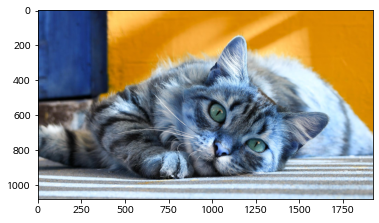

In [ ]:
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()

img=cv2.imread("cat.jpg")
plt.imshow(img)

(1, 100, 100, 3)
(1, 96, 96, 32)


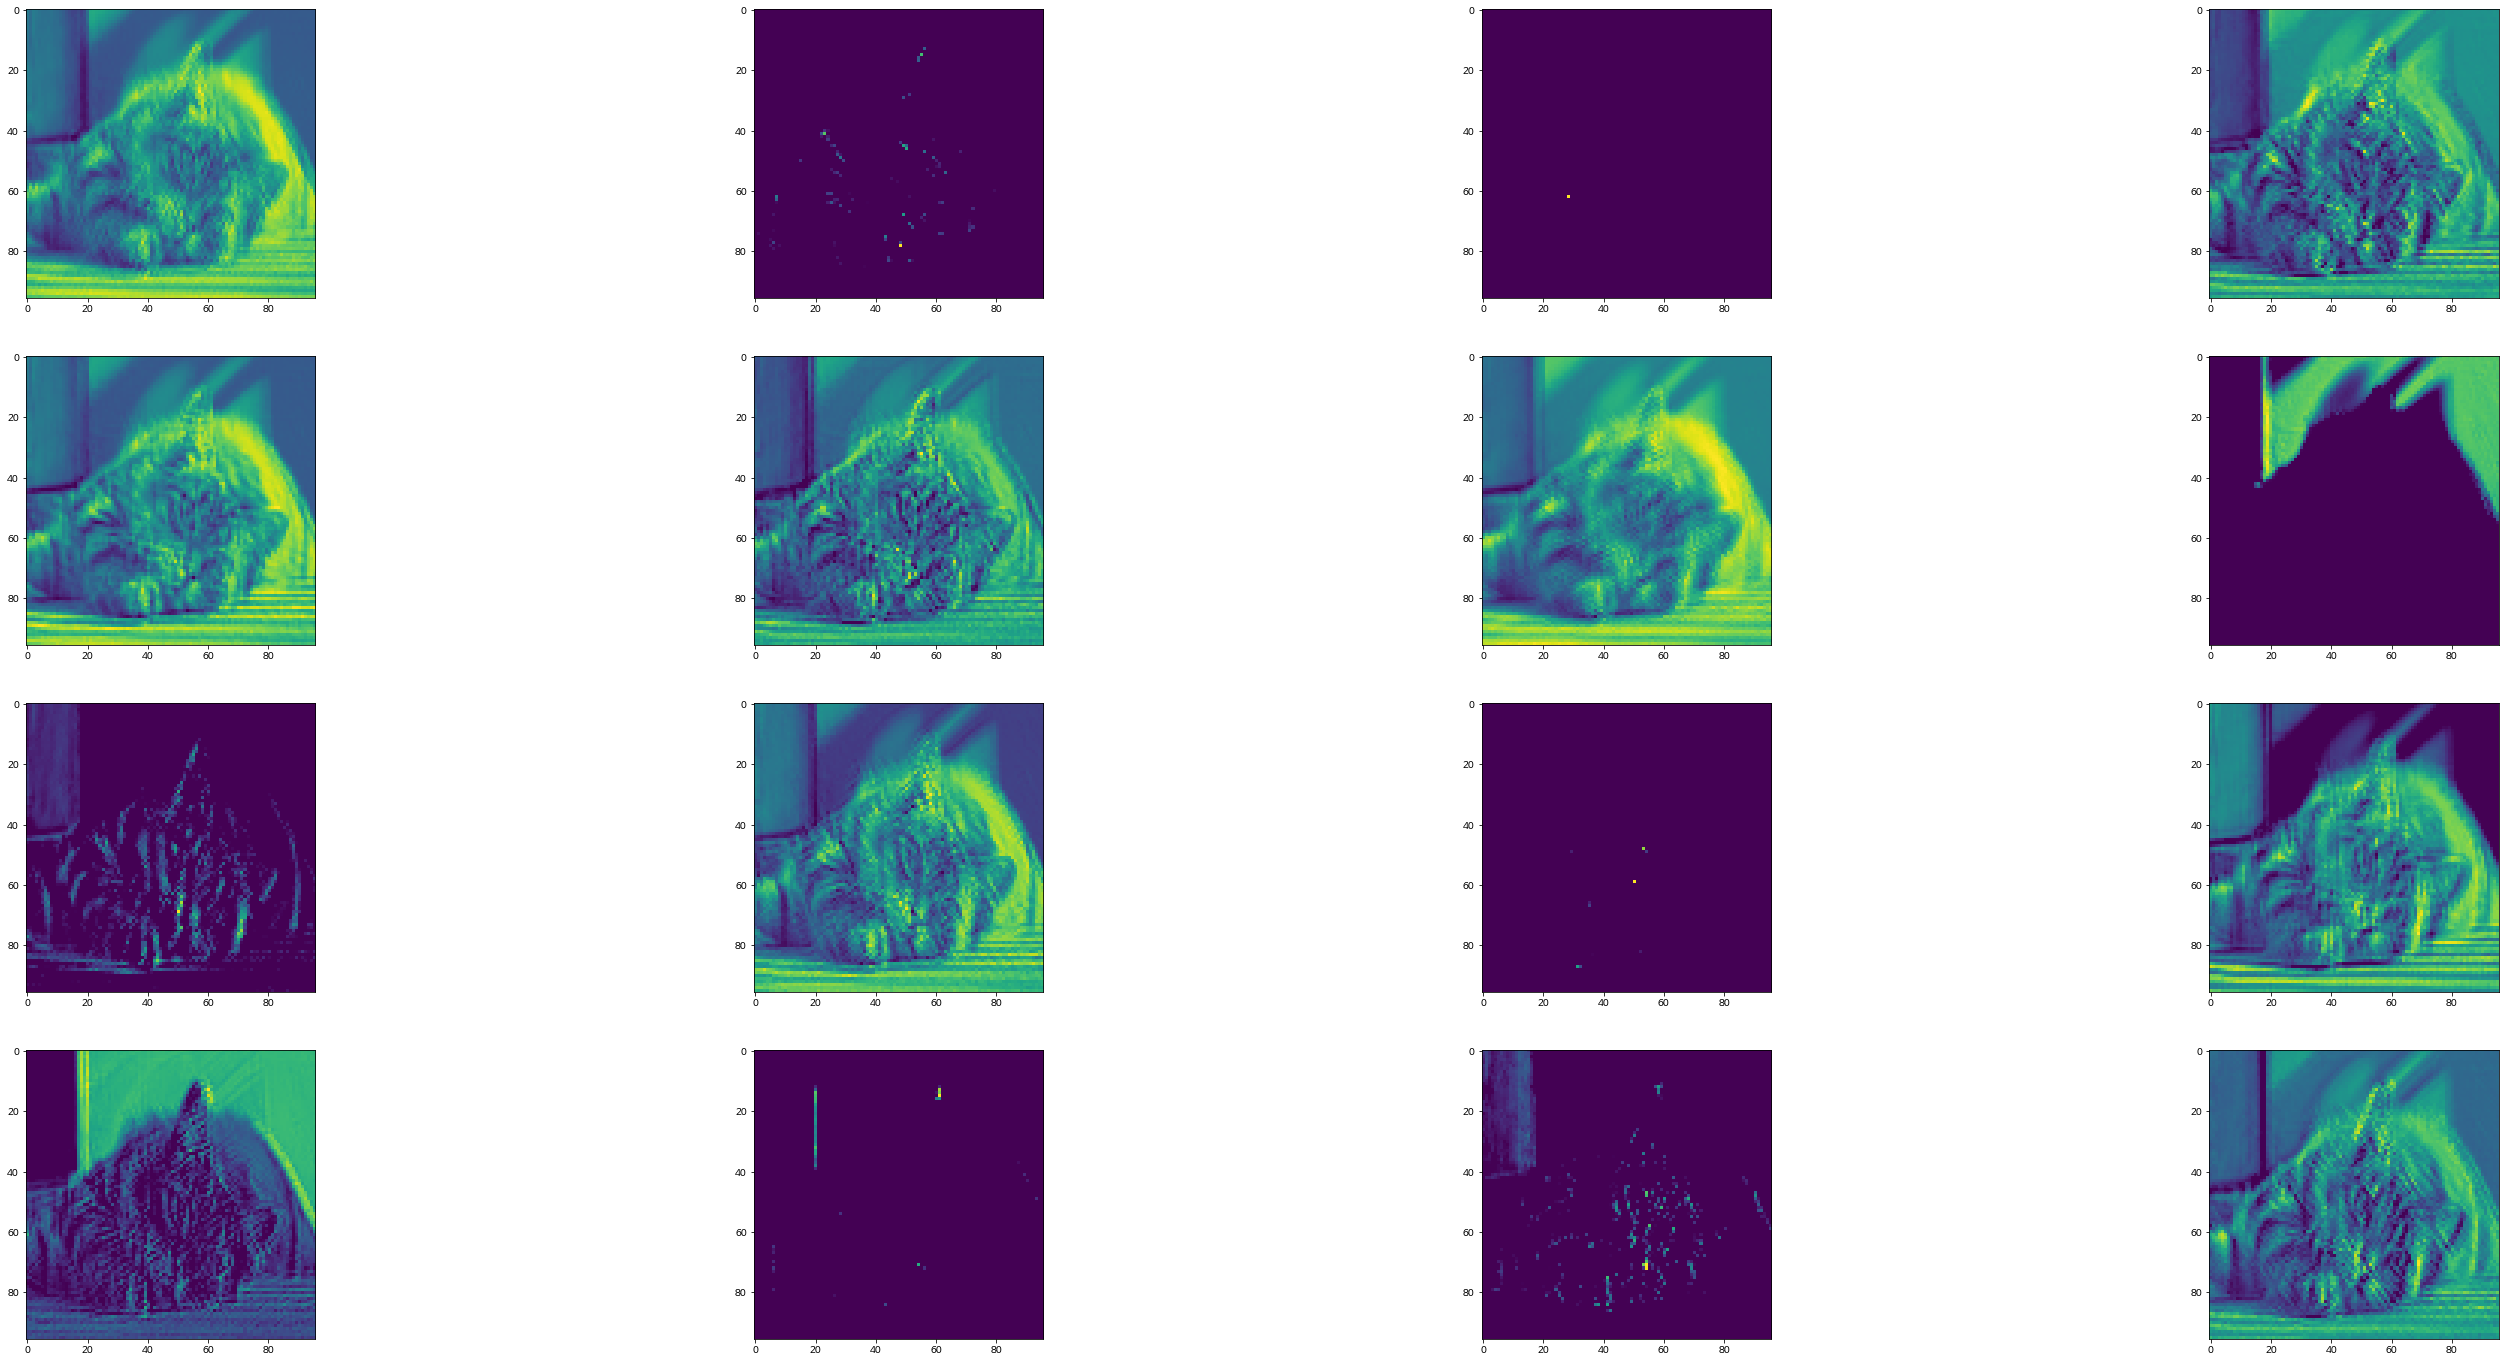

In [ ]:
img = cv2.resize(img, (100, 100))  # 이미지를 100x100 크기로 리사이즈
input_img = np.expand_dims(img, axis=0)  # 배치 차원 추가 (모델 입력 형식에 맞게 배치 차원을 추가)
print(input_img.shape)  # 입력 이미지 형태 출력 (배치 차원이 추가되어 (1, 100, 100, 3) 형태)

# feature_map에서 예측값을 계산하여 첫 번째 Conv2D 레이어의 출력값을 얻음
feature = feature_map.predict(input_img)
print(feature.shape)  # feature 맵의 형태 출력

# 첫 번째 Conv2D 레이어의 필터가 출력하는 특징들을 시각화
fig = plt.figure(figsize=(50, 50))
for i in range(16):  # 첫 번째 Conv2D 레이어에서 16개의 필터 출력을 시각화
    ax = fig.add_subplot(8, 4, i + 1)  # 8x4 그리드로 서브플롯 생성
    ax.imshow(feature[0, :, :, i])  # 필터의 출력 특징 맵을 이미지로 표시


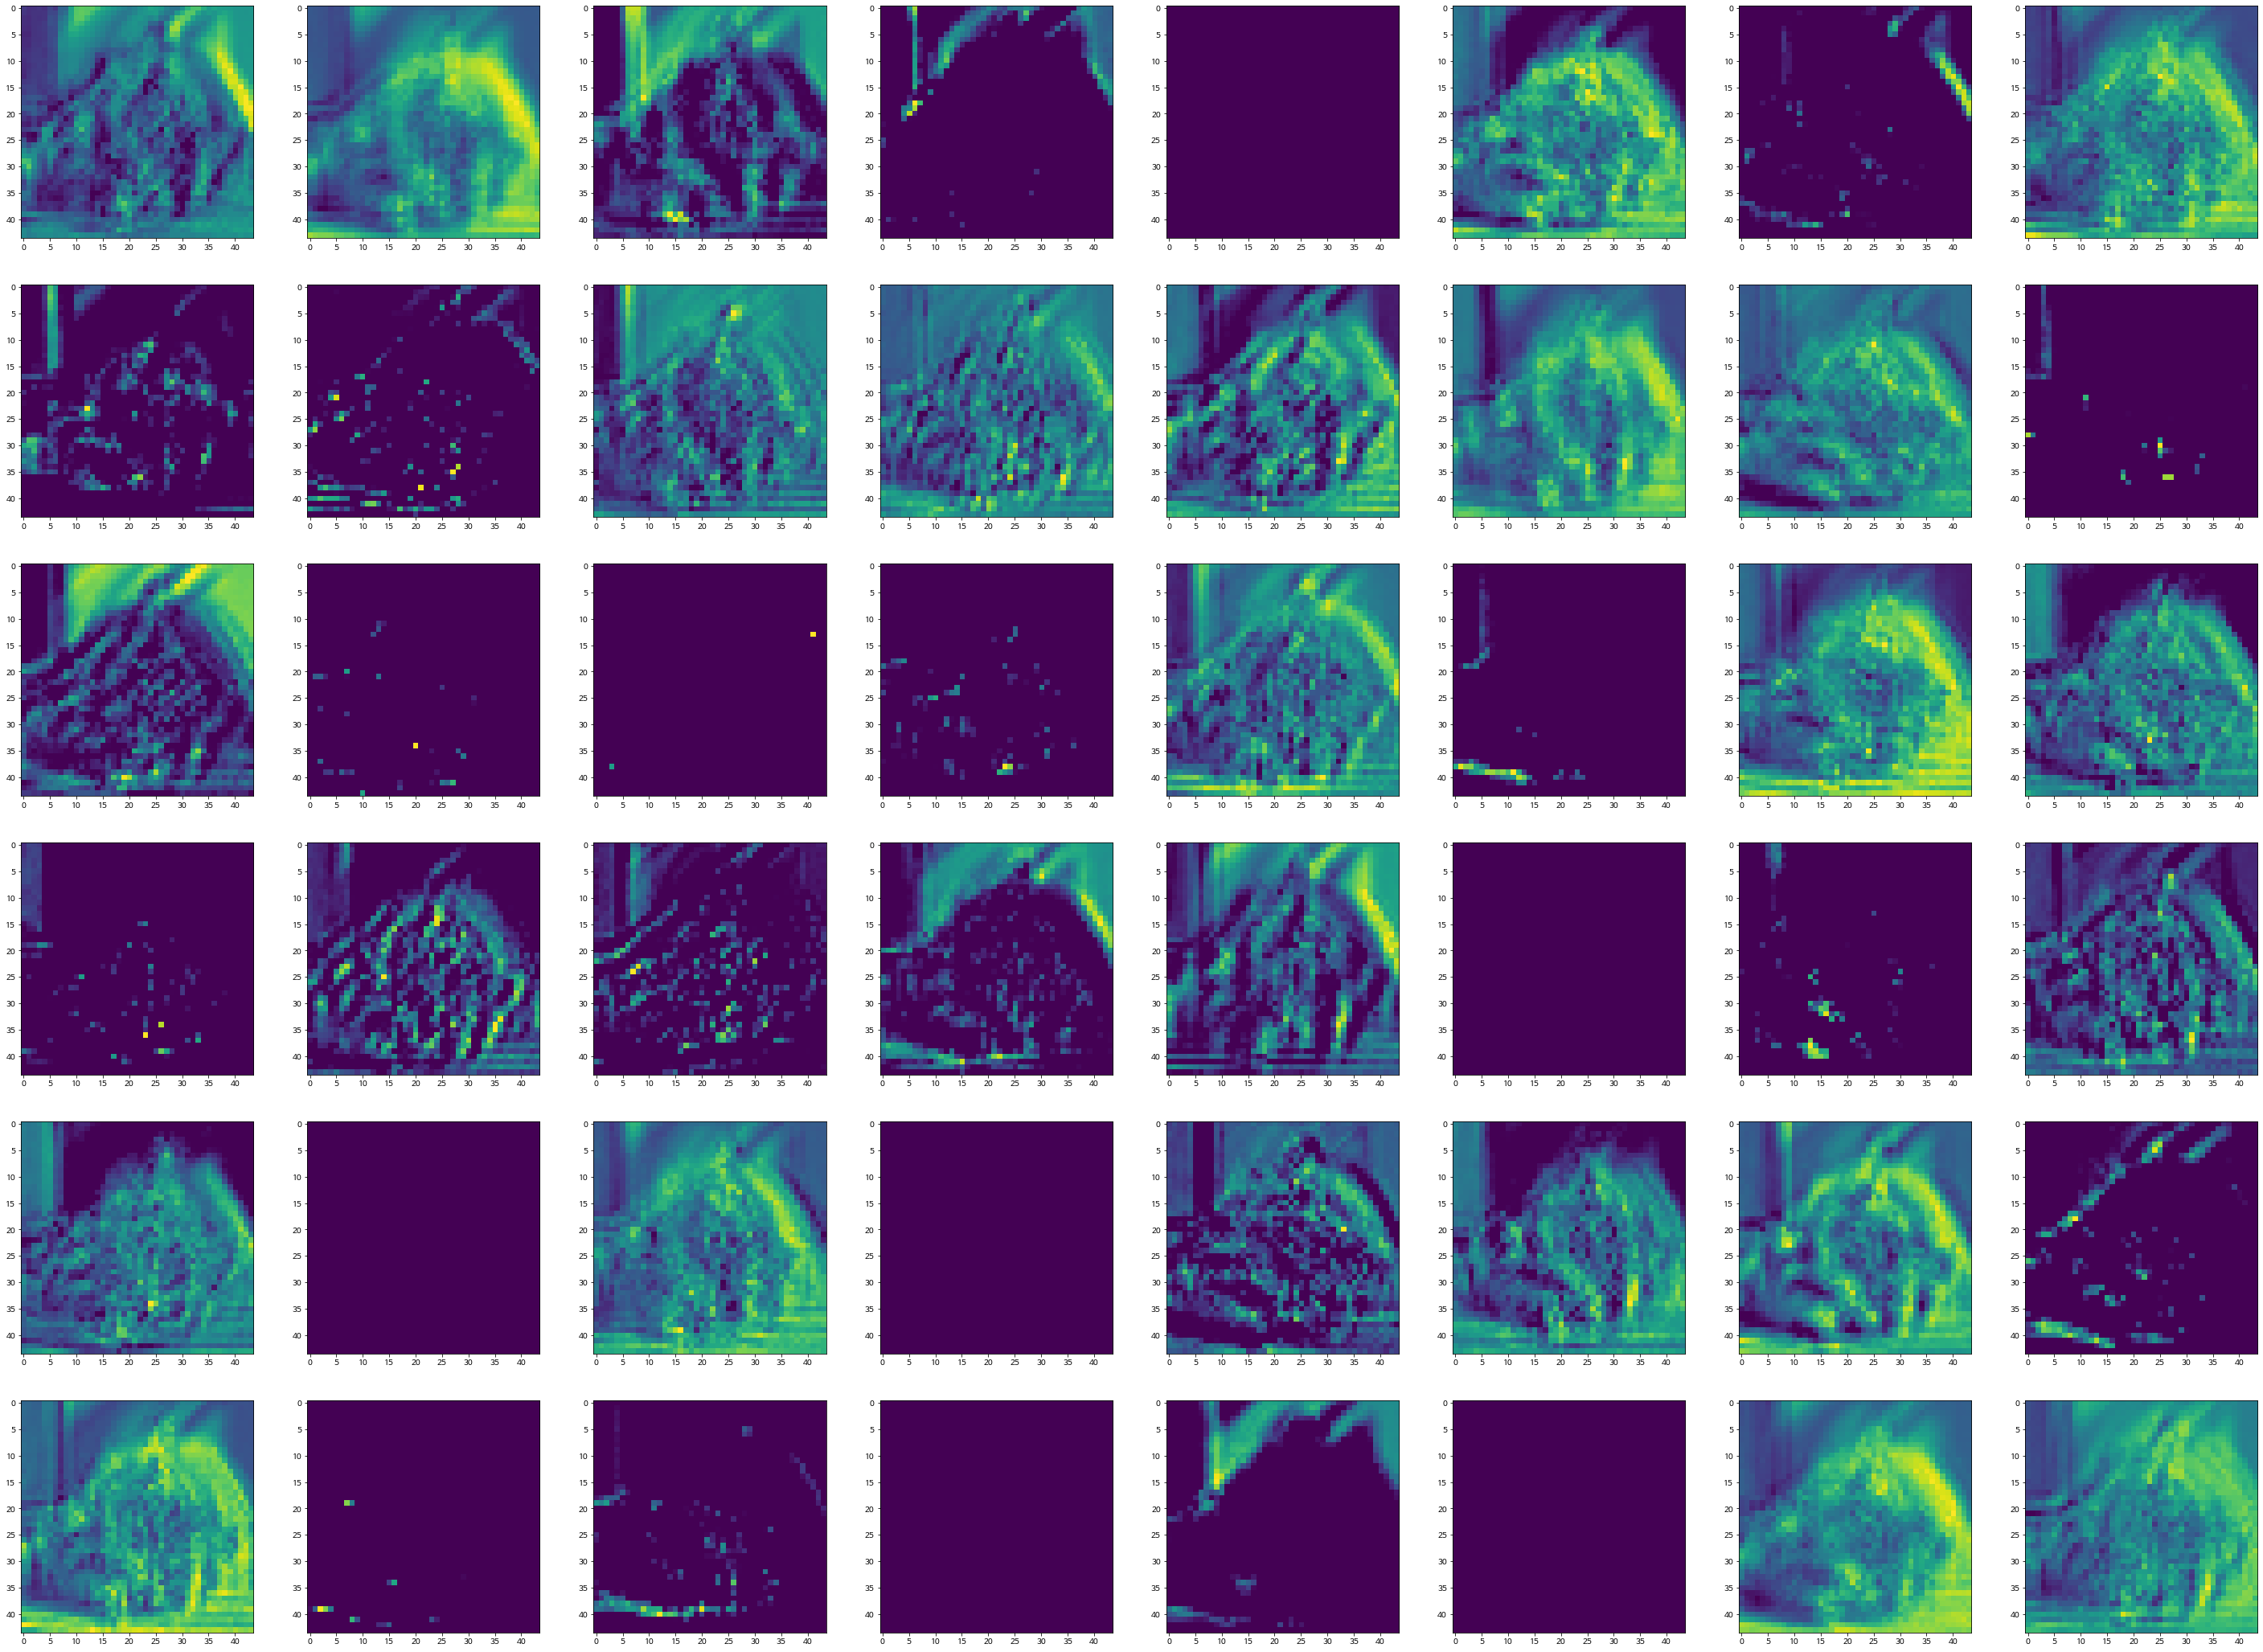

In [ ]:
ins= model.inputs
outs= model.layers[2].output                    # 3번째 Conv2D 레이어(인덱스 2)의 출력을 가져옴
feature_map= Model(inputs= ins, outputs= outs)  # 모델 입력과 출력으로 특징 맵을 추출하는 모델 생성
img=cv2.imread("cat.jpg")
img=cv2.resize(img,(100,100))                   # 모델의 입력 크기에 맞게 이미지를 리사이즈
input_img= np.expand_dims(img, axis=0)          # 배치 차원 추가하여 모델 입력에 맞게 변형

# feature_map 모델을 사용하여 입력 이미지의 특징 맵을 추출
feature=feature_map.predict(input_img)
fig= plt.figure(figsize=(50,50))

# 48개의 필터에 대해 각 필터의 특징 맵을 8x8 그리드에 시각화
for i in range(48):
    ax=fig.add_subplot(8,8,i+1)# 8x8 그리드로 서브플롯을 추가 (총 48개)
    ax.imshow(feature[0,:,:,i]) # i번째 필터의 특징 맵을 시각화 (feature[0, :, :, i]는 첫 번째 이미지의 i번째 필터 결과)

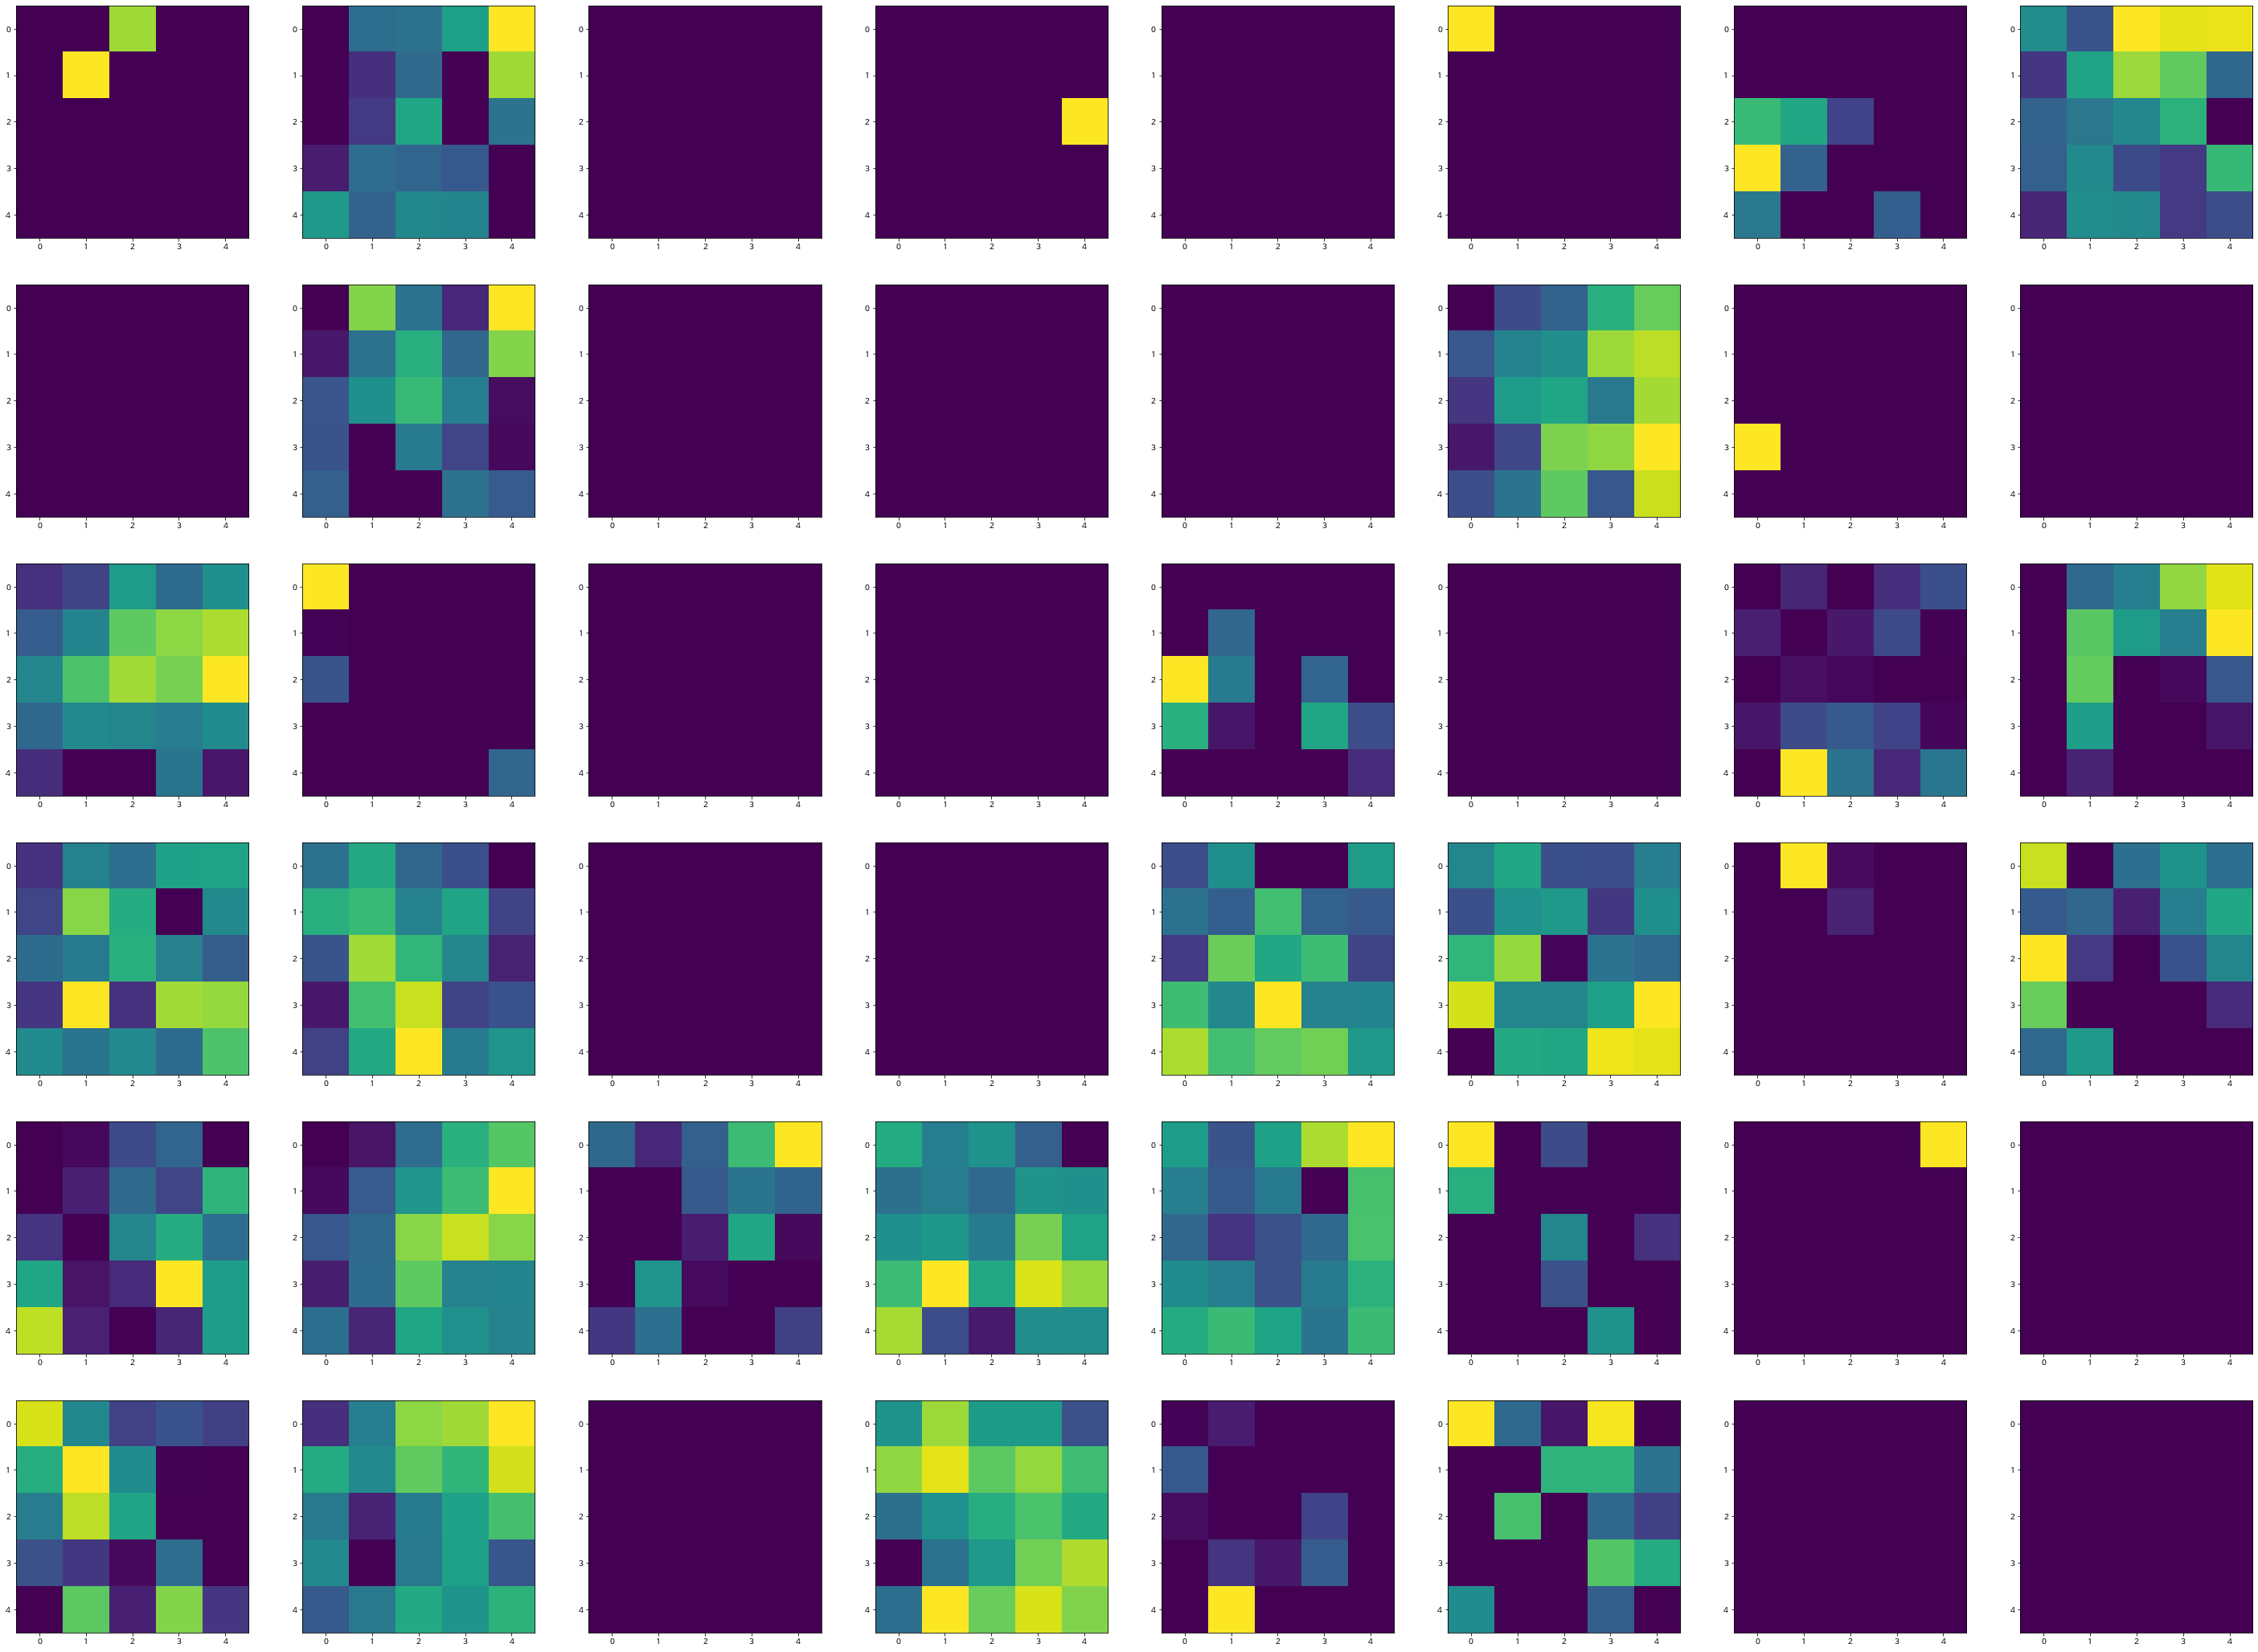

In [ ]:
ins = model.inputs  # 모델의 입력 텐서를 추출
outs = model.layers[6].output  # 6번째 Conv2D 레이어(인덱스 6)의 출력을 추출

feature_map = Model(inputs=ins, outputs=outs)  # 입력은 기존 모델의 입력, 출력은 6번째 Conv2D 레이어의 출력인 새로운 모델 정의

img = cv2.imread("cat.jpg")  # 이미지를 읽어옴
img = cv2.resize(img, (100, 100))  # 이미지를 100x100 크기로 리사이즈

input_img = np.expand_dims(img, axis=0)  # 이미지를 배치 차원(1, 100, 100, 3)으로 확장

feature = feature_map.predict(input_img)  # feature_map 모델을 사용하여 입력 이미지의 특징 맵 추출

fig = plt.figure(figsize=(50, 50))  # 특징 맵을 시각화하기 위한 큰 크기의 그림 설정

for i in range(48):  # 48개의 필터에 대해 시각화
    ax = fig.add_subplot(8, 8, i + 1)  # 8x8 그리드로 서브플롯을 추가 (총 48개)
    ax.imshow(feature[0, :, :, i])  # i번째 필터의 특징 맵을 시각화 (feature[0, :, :, i]는 첫 번째 이미지의 i번째 필터 결과)
